# Data Processing for Ingestion
Goal: Prepare the data for ingestion by neo4j

In [4]:
print("Importing packages...")
from py2neo import Graph, Node, Relationship
from dotenv import load_dotenv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


print("Completed!")

Importing packages...
Completed!


## Dataset

In [5]:
print("Importing data...")
df = pd.read_csv("data/full_data_with_credits.csv")
# df = data.drop(data.columns[0], axis = 1)
df.head()

Importing data...


,id,title,overview,popularity,release_date,vote_average,vote_count,genre_ids,genres,actors,director
0,912649,Venom: The Last Dance,Eddie and Venom are on the run. Hunted by both...,3046.021,2024-10-22,6.489,808,"[878, 28, 12]","['Science Fiction', 'Action', 'Adventure']","['Tom Hardy', 'Chiwetel Ejiofor', 'Juno Temple...",Kelly Marcel
1,1034541,Terrifier 3,Five years after surviving Art the Clown's Hal...,1866.107,2024-10-09,6.922,1055,"[27, 53, 9648]","['Horror', 'Thriller', 'Mystery']","['Lauren LaVera', 'David Howard Thornton', 'Sa...",Damien Leone
2,1184918,The Wild Robot,"After a shipwreck, an intelligent robot called...",1818.285,2024-09-12,8.474,2975,"[16, 878, 10751]","['Animation', 'Science Fiction', 'Family']","[""Lupita Nyong'o"", 'Pedro Pascal', 'Kit Connor...",Chris Sanders
3,558449,Gladiator II,Years after witnessing the death of the revere...,1760.337,2024-11-13,6.796,524,"[28, 12, 18]","['Action', 'Adventure', 'Drama']","['Paul Mescal', 'Denzel Washington', 'Pedro Pa...",Ridley Scott
4,1118031,Apocalypse Z: The Beginning of the End,When a kind of rabies that transforms people i...,1556.700,2024-10-04,6.764,519,"[18, 28, 27]","['Drama', 'Action', 'Horror']","['Francisco Ortiz', 'José María Yázpik', 'Bert...",Carles Torrens


### Variables

- **id (int)**: Unique identifier for each movie.
- **title (str)**: The movie's title.
- **genre_ids (list[int])**: List of genre IDs associated with the movie (e.g., `[28, 12]` for Action and Adventure genres).
- **overview (str)**: Brief description or summary of the movie.
- **popularity (float)**: Popularity score based on TMDb's algorithm (typical range: `0.0` to `1000.0+`).
- **release_date (str)**: Release date of the movie in `YYYY-MM-DD` format.
- **vote_average (float)**: Average user rating on a scale from `0.0` to `10.0`.
- **vote_count (int)**: Number of user ratings received.


In [6]:
print(f"The shape of the dataset is {df.shape}")

The shape of the dataset is (2000, 11)


Popularity Summary Statistics:
count    2000.000000
mean       97.554040
std       141.746669
min        28.024000
25%        52.559000
50%        66.571500
75%        95.338250
max      3046.021000
Name: popularity, dtype: float64


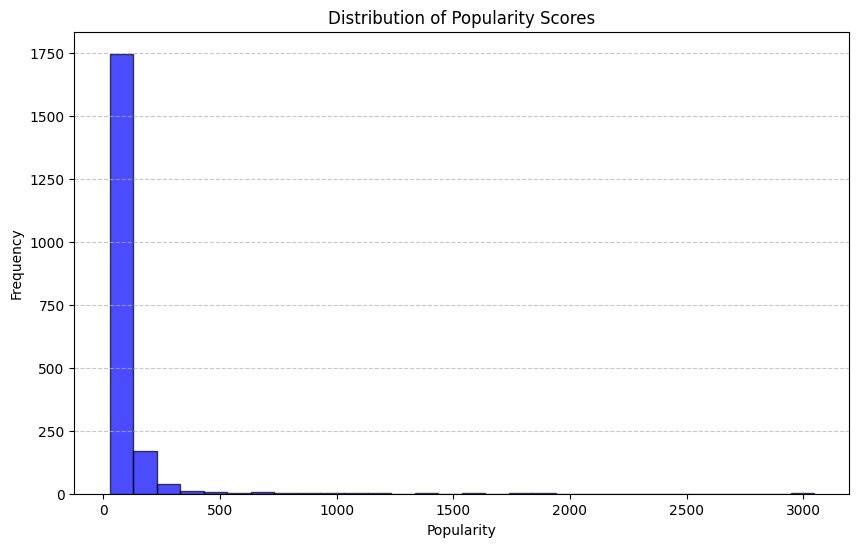

In [7]:
popularity_description = df['popularity'].describe()
print("Popularity Summary Statistics:")
print(popularity_description)

# Plotting the popularity distribution
plt.figure(figsize=(10, 6))
plt.hist(df['popularity'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Distribution of Popularity Scores")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


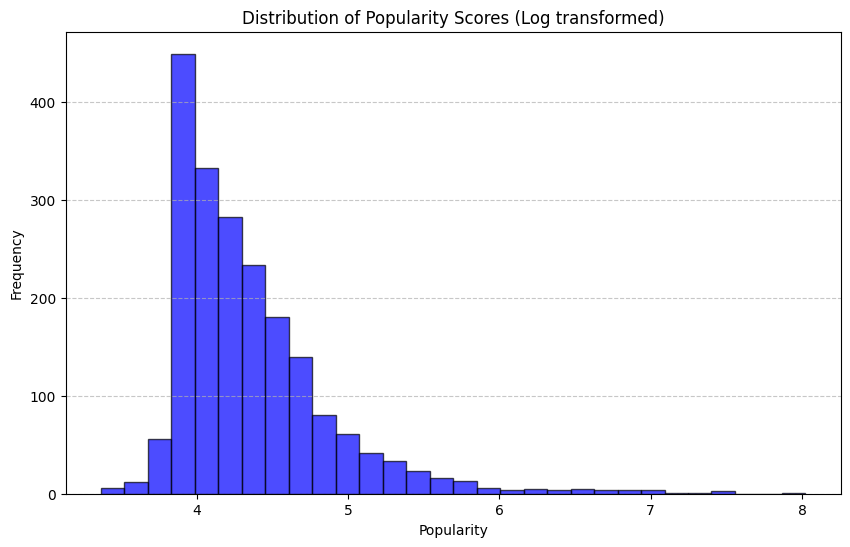

In [8]:
## given the high right-skew, we will log transform this data
df['log_popularity'] = np.log1p(df['popularity']) 

# Plotting the popularity distribution
plt.figure(figsize=(10, 6))
plt.hist(df['log_popularity'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Distribution of Popularity Scores (Log transformed)")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Popularity Bin Distribution (Log-Transformed with qcut):
popularity_bin
Very Low     334
Low          333
Moderate     333
High         333
Very High    333
Top          334
Name: count, dtype: int64


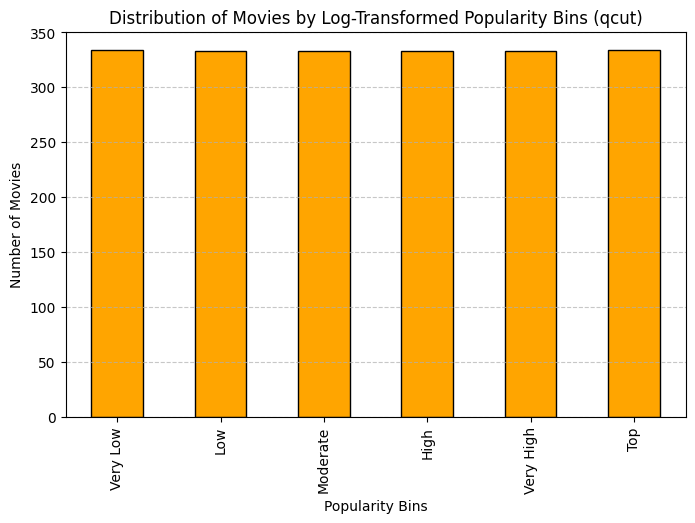

In [9]:
# Using log transformed values, categorize the values into bins
df['popularity_bin'] = pd.qcut(df['log_popularity'], q=6, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Top'])

# Output bin distribution
popularity_bin_distribution = df['popularity_bin'].value_counts().sort_index()
print("\nPopularity Bin Distribution (Log-Transformed with qcut):")
print(popularity_bin_distribution)

# Plot the popularity bin distribution
plt.figure(figsize=(8, 5))
popularity_bin_distribution.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Distribution of Movies by Log-Transformed Popularity Bins (qcut)")
plt.xlabel("Popularity Bins")
plt.ylabel("Number of Movies")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Save the updated DataFrame
df.to_csv('data/training_data/full_data_binned_log.csv', index=False)